# Patient Risk Level Machine Learning Project

# Dataset Overview

This dataset captures **vital signs and clinical indicators** of patients to assess their **risk level**.
It includes key physiological parameters such as respiratory rate, oxygen saturation, blood pressure, heart rate, temperature, and consciousness level, along with oxygen therapy status.
The goal is to predict a patient’s **risk level (Normal, Low, Medium, or High)** based on these health-related attributes.

---

## Table of Contents

1. [Dataset Overview & Features](#dataset-overview--features)
2. [Introduction](#introduction)
3. [Import Libraries](#import-libraries)
4. [Data Preprocessing](#data-preprocessing)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
6. [Model Development](#model-development)
7. [Model Evaluation](#model-evaluation)
8. [Conclusion](#conclusion)

---

## Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset contains **vital signs and oxygen therapy data** from multiple patients.
The objective is to use these indicators to determine each patient’s **clinical risk level**, which could assist in **early detection of deterioration** and **clinical decision support**.

### Features

| Feature               | Description                                                                  |
| --------------------- | ---------------------------------------------------------------------------- |
| **Patient_ID**        | Unique identifier assigned to each patient.                                  |
| **Respiratory_Rate**  | Number of breaths per minute.                                                |
| **Oxygen_Saturation** | Percentage of oxygen-saturated hemoglobin in the blood.                      |
| **O2_Scale**          | Clinical oxygen scale indicator used for patient monitoring.                 |
| **Systolic_BP**       | Systolic blood pressure (mmHg).                                              |
| **Heart_Rate**        | Number of heartbeats per minute.                                             |
| **Temperature**       | Body temperature in degrees Celsius.                                         |
| **Consciousness**     | Level of patient awareness (e.g., Alert, Pain, Voice).                       |
| **On_Oxygen**         | Indicates if the patient is receiving supplemental oxygen (0 = No, 1 = Yes). |

---

### Target Variable

| Target Variable | Description                                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Risk_Level**  | Categorical outcome with possible values: **Normal, Low, Medium, High** — representing the overall clinical risk severity. |

Higher classes such as **High** indicate critical health conditions, whereas **Normal** represents stable vital signs.


In [1]:
#Multi Classification and implement same on real-world dataset using One-vs-All(OvA) and One-vs-One(OvO)

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## Libraries Imported

## Data Loading and Structure

In [2]:
url  = 'Health_Risk_Dataset.csv'
df = pd.read_csv(url)
df

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low
...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,A,0,Normal
996,P0271,19,95,1,129,70,38.1,A,0,Low
997,P0861,39,82,1,101,137,37.5,A,1,High
998,P0436,15,92,1,106,108,38.6,A,0,Medium


In [3]:
df = df.drop('Patient_ID', axis=1)

In [5]:
df.isna().sum()

Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

### No missing values detected

In [6]:
df.duplicated().sum()

np.int64(0)

#### No duplicate rows found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   int64  
 1   Oxygen_Saturation  1000 non-null   int64  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   Consciousness      1000 non-null   object 
 7   On_Oxygen          1000 non-null   int64  
 8   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


## Descriptive Statistics

In [ ]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


## Data Visualization

Text(0.5, 1.0, 'Distribution Of Risk Level')

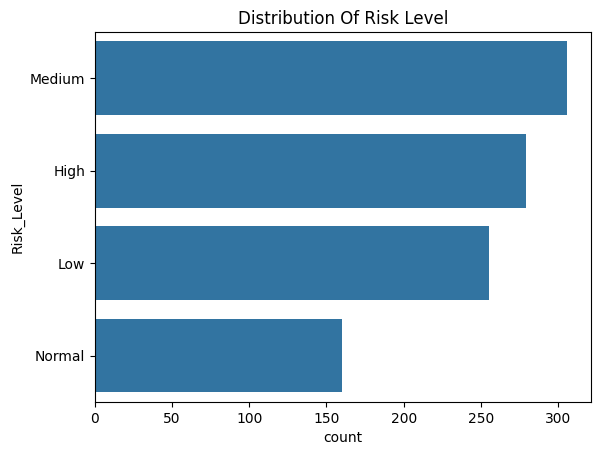

In [9]:
sns.countplot(y = 'Risk_Level', data=df)
plt.title('Distribution Of Risk Level')

## Data Preprocessing and Preparation

### Encoding Numarical Columns

In [10]:
# Standardizing numeric columns (both int and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_columns])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(numeric_columns))

# Combine scaled numeric data with non-numeric data
scaled_data = pd.concat([df.drop(columns=numeric_columns), scaled_df], axis=1)

### Encoding Categorical Columns

In [12]:
#Identifying Categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.to_list()
categorical_columns.remove('Risk_Level')

#Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

#Converting to a dataframe
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

#Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

### Encoding Target Column

In [13]:
#Encoding the target variable
prepped_data['Risk_Level'] = prepped_data['Risk_Level'].astype('category').cat.codes

### Preparing Final Dataset

In [14]:
#Preparing Final Dataset
X = prepped_data.drop('Risk_Level', axis=1)
y = prepped_data['Risk_Level']

### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [15]:
#Stratify ensures equal distribution of each class(target) to train with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

## Model Development: Logistic Regression (OvA vs OvO)

To predict the **fitness performance class (A–D)**, a **Logistic Regression** model was trained using two multi-class classification strategies:

1. **One-vs-All (OvA)** — trains one model per class against all others.
2. **One-vs-One (OvO)** — trains one model for every pair of classes.


**One-vs-All (OvA)** — trains one model per class against all others.

In [16]:
#Training logistic regression model using One Vs All(default)
# OVR means the model is trained on one logistic regression per class => so A vs (B,C,D) aand vice versa
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000) #Iterations improve the accuracy of the mode,
model_ova.fit(X_train, y_train)

c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [17]:
y_pred_ova = model_ova.predict(X_test)

#Evaluation metrics for OvA
print('One-Vs-All (OvA) Strategy')
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova), 2)}%')
print(F'Error {mean_squared_error(y_test, y_pred_ova)}')

One-Vs-All (OvA) Strategy
Accuracy: 83.5%
Error 0.24


**One-vs-One (OvO)** — trains one model for every pair of classes.

In [18]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


In [19]:
y_pred_ovo = model_ovo.predict(X_test)

#Evaluations 
print("OVO Strat")
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo), 2)}%')
print(F'Error {mean_squared_error(y_test, y_pred_ovo)}')

OVO Strat
Accuracy: 95.0%
Error 0.11


### Evaluating Different Test Sizes
To test model stability, different test splits were evaluated (10% and 30% test sizes).

In [20]:
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=67, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f'Test Size: {test_size}')
    print("Accuracy", accuracy_score(y_test, y_pred))

Test Size: 0.1
Accuracy 0.86
Test Size: 0.3
Accuracy 0.8466666666666667


c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Model Prediction Visualizations

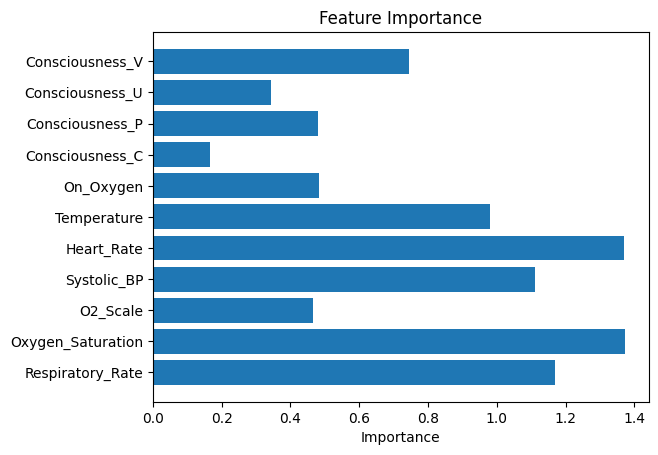

Text(0.5, 0, 'Importance')

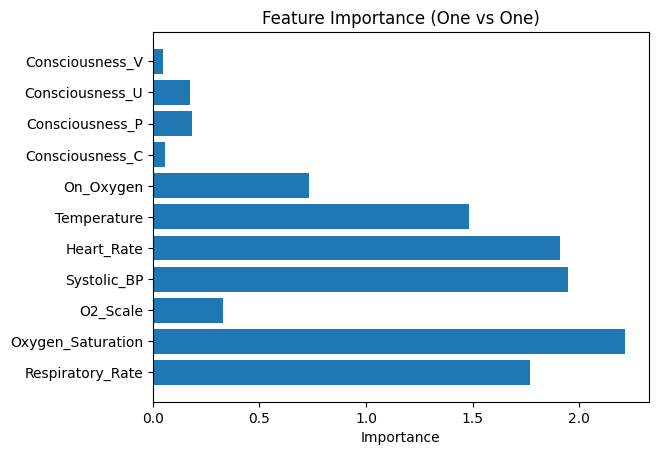

In [21]:
#Feature Importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

#For One vs One model
# Collect all coefficeints from each underluing binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

#Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

plt.barh(X.columns, feature_importance)
plt.title('Feature Importance (One vs One)')
plt.xlabel("Importance")

# Linear Regression Model

In [ ]:
#LINEAR REGRESSION 

lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

# Evaluate model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"R² Score: {r2_lin}")

Linear Regression Results
Mean Squared Error (MSE): 0.4381654801245616
R² Score: 0.6040037233771436


# Polynomial Regression Model

In [29]:
#POLYNOMIAL REGRESSION 
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict on test data
y_pred_poly = poly_reg.predict(X_poly_test)

# Evaluate polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R² Score: {r2_poly}")


Polynomial Regression Results
Mean Squared Error (MSE): 0.9131708310168498
R² Score: 0.17471305840781182
